# Residential Demand Model

In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from pandas.tseries.offsets import MonthEnd

### read in historical data

In [3]:
df_historical = pd.read_csv("../data/raw/Residential/AUS_data.csv")

In [4]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 30 columns):
Economy    37 non-null object
Year       37 non-null int64
RETT       37 non-null int64
RECL       37 non-null int64
RECP       37 non-null int64
REPP       37 non-null int64
REKR       37 non-null int64
REGD       37 non-null int64
RELP       37 non-null int64
RENG       37 non-null int64
REGL       37 non-null int64
REOT       37 non-null int64
REEL       37 non-null int64
CSTT       37 non-null int64
CSCL       37 non-null int64
CSCP       37 non-null int64
CSPP       37 non-null int64
CSKR       37 non-null int64
CSGD       37 non-null int64
CSFO       37 non-null int64
CSLP       37 non-null int64
CSNG       37 non-null int64
CSGL       37 non-null int64
CSOT       37 non-null int64
CSEL       37 non-null int64
GDP        37 non-null float64
CSGDP      37 non-null float64
POP        37 non-null float64
POPU       37 non-null float64
GDPC       37 non-null float64
dtypes: float64(

In [5]:
df_historical.head()

,Economy,Year,RETT,RECL,RECP,REPP,REKR,REGD,RELP,RENG,...,CSLP,CSNG,CSGL,CSOT,CSEL,GDP,CSGDP,POP,POPU,GDPC
0,01_AUS,1980,6040,19,39,785,574,91,120,1103,...,95,387,0,22,1332,439.40,251.30,14.69,12.57,29907.53
1,01_AUS,1981,6098,18,31,586,385,81,120,1184,...,92,419,0,24,1447,454.07,263.59,14.93,12.79,30419.25
2,01_AUS,1982,6305,17,22,541,340,76,125,1318,...,92,486,0,24,1509,469.18,272.66,15.18,13.00,30912.00
3,01_AUS,1983,6309,15,16,473,280,68,125,1367,...,95,522,0,23,1565,458.76,271.43,15.37,13.16,29849.91
4,01_AUS,1984,6411,14,14,441,246,64,131,1418,...,103,552,0,19,1591,479.78,281.19,15.54,13.31,30865.99


### Make year column YYYY-MM-DD format for Prophet

In [6]:
df_historical = df_historical.set_index(['Economy'])
df_historical.head()

,Year,RETT,RECL,RECP,REPP,REKR,REGD,RELP,RENG,REGL,...,CSLP,CSNG,CSGL,CSOT,CSEL,GDP,CSGDP,POP,POPU,GDPC
Economy,,,,,,,,,,,,,,,,,,,,,
01_AUS,1980,6040,19,39,785,574,91,120,1103,19,...,95,387,0,22,1332,439.40,251.30,14.69,12.57,29907.53
01_AUS,1981,6098,18,31,586,385,81,120,1184,25,...,92,419,0,24,1447,454.07,263.59,14.93,12.79,30419.25
01_AUS,1982,6305,17,22,541,340,76,125,1318,30,...,92,486,0,24,1509,469.18,272.66,15.18,13.00,30912.00
01_AUS,1983,6309,15,16,473,280,68,125,1367,37,...,95,522,0,23,1565,458.76,271.43,15.37,13.16,29849.91
01_AUS,1984,6411,14,14,441,246,64,131,1418,43,...,103,552,0,19,1591,479.78,281.19,15.54,13.31,30865.99


In [7]:
df_historical.tail()

,Year,RETT,RECL,RECP,REPP,REKR,REGD,RELP,RENG,REGL,...,CSLP,CSNG,CSGL,CSOT,CSEL,GDP,CSGDP,POP,POPU,GDPC
Economy,,,,,,,,,,,,,,,,,,,,,
01_AUS,2012,10454,0,0,377,0,24,353,3244,286,...,73,1053,10,29,5243,1220.18,801.23,22.73,19.41,53673.10
01_AUS,2013,10485,0,0,385,0,23,362,3329,305,...,77,1048,9,46,5417,1252.09,821.19,23.13,19.78,54137.19
01_AUS,2014,10329,0,0,379,0,24,355,3416,307,...,80,1130,9,50,5444,1284.25,839.55,23.48,20.10,54705.73
01_AUS,2015,10491,0,1,369,0,26,343,3488,345,...,84,1214,10,47,5772,1314.26,863.02,23.82,20.41,55183.74
01_AUS,2016,10518,0,1,342,0,0,342,3564,346,...,82,1256,10,58,5789,1351.67,894.55,24.19,20.76,55875.10


In [8]:
df_historical['ds'] = pd.to_datetime(df_historical['Year'], format="%Y") + MonthEnd(12)
df_historical.head()

,Year,RETT,RECL,RECP,REPP,REKR,REGD,RELP,RENG,REGL,...,CSNG,CSGL,CSOT,CSEL,GDP,CSGDP,POP,POPU,GDPC,ds
Economy,,,,,,,,,,,,,,,,,,,,,
01_AUS,1980,6040,19,39,785,574,91,120,1103,19,...,387,0,22,1332,439.40,251.30,14.69,12.57,29907.53,1980-12-31
01_AUS,1981,6098,18,31,586,385,81,120,1184,25,...,419,0,24,1447,454.07,263.59,14.93,12.79,30419.25,1981-12-31
01_AUS,1982,6305,17,22,541,340,76,125,1318,30,...,486,0,24,1509,469.18,272.66,15.18,13.00,30912.00,1982-12-31
01_AUS,1983,6309,15,16,473,280,68,125,1367,37,...,522,0,23,1565,458.76,271.43,15.37,13.16,29849.91,1983-12-31
01_AUS,1984,6411,14,14,441,246,64,131,1418,43,...,552,0,19,1591,479.78,281.19,15.54,13.31,30865.99,1984-12-31


In [33]:
simple_df = df_historical[['RETT','GDP','POP','ds']]
simple_df.head()

,RETT,GDP,POP,ds
Economy,,,,
01_AUS,6040,439.40,14.69,1980-12-31
01_AUS,6098,454.07,14.93,1981-12-31
01_AUS,6305,469.18,15.18,1982-12-31
01_AUS,6309,458.76,15.37,1983-12-31
01_AUS,6411,479.78,15.54,1984-12-31


In [34]:
simple_df = simple_df.rename(columns={"RETT":"y"})
simple_df.head()

,y,GDP,POP,ds,per capita
Economy,,,,,
01_AUS,6040,439.40,14.69,1980-12-31,29.911504
01_AUS,6098,454.07,14.93,1981-12-31,30.413262
01_AUS,6305,469.18,15.18,1982-12-31,30.907773
01_AUS,6309,458.76,15.37,1983-12-31,29.847755
01_AUS,6411,479.78,15.54,1984-12-31,30.873874


In [11]:
economies = simple_df.index.unique()
economies

Index(['01_AUS'], dtype='object', name='Economy')

In [12]:
models ={}
for economy in economies:
    m = Prophet(daily_seasonality=False,
                   weekly_seasonality=False,
                   yearly_seasonality=False,
                   seasonality_mode='additive',
                   growth='linear')
    m.add_regressor('GDP')
    m.add_regressor('POP')
    models[economy] = m

In [13]:
models

{'01_AUS': <fbprophet.forecaster.Prophet at 0x1fefa83e208>}

### fit models

In [14]:
for economy,model in models.items():
    model.fit(simple_df.loc[economy])  

### read in future macro data

In [15]:
df_future_macro = pd.read_csv('../data/raw/Industry/MacroAssumptions.csv')
df_future_macro['ds'] = pd.to_datetime(df_future_macro['Year'], format="%Y") + MonthEnd(12)
df_future_macro.head()

,Economy,Year,GDP,Population,ds
0,AUS,2017,1157.283926,24.451,2017-12-31
1,AUS,2018,1201.142573,24.772,2018-12-31
2,AUS,2019,1245.039044,25.089,2019-12-31
3,AUS,2020,1289.224526,25.398,2020-12-31
4,AUS,2021,1333.639686,25.700,2021-12-31


In [16]:
df_future_macro.tail()

,Economy,Year,GDP,Population,ds
709,VN,2046,2411.704114,113.481,2046-12-31
710,VN,2047,2502.285597,113.800,2047-12-31
711,VN,2048,2594.447303,114.099,2048-12-31
712,VN,2049,2688.477582,114.376,2049-12-31
713,VN,2050,2784.627331,114.630,2050-12-31


In [17]:
EconomyNames = {'AUS':'01_AUS'}
df_future_macro.replace(EconomyNames,inplace=True)

In [18]:
df_future_macro.head()

,Economy,Year,GDP,Population,ds
0,01_AUS,2017,1157.283926,24.451,2017-12-31
1,01_AUS,2018,1201.142573,24.772,2018-12-31
2,01_AUS,2019,1245.039044,25.089,2019-12-31
3,01_AUS,2020,1289.224526,25.398,2020-12-31
4,01_AUS,2021,1333.639686,25.700,2021-12-31


In [19]:
df_future_macro = df_future_macro.set_index('Economy')

### create regressors for 1980-2050

In [20]:
regressors_hist = simple_df.drop(columns=['y'])

In [21]:
regressors_hist.head()

,GDP,POP,ds
Economy,,,
01_AUS,439.40,14.69,1980-12-31
01_AUS,454.07,14.93,1981-12-31
01_AUS,469.18,15.18,1982-12-31
01_AUS,458.76,15.37,1983-12-31
01_AUS,479.78,15.54,1984-12-31


In [22]:
regressors_hist.tail()

,GDP,POP,ds
Economy,,,
01_AUS,1220.18,22.73,2012-12-31
01_AUS,1252.09,23.13,2013-12-31
01_AUS,1284.25,23.48,2014-12-31
01_AUS,1314.26,23.82,2015-12-31
01_AUS,1351.67,24.19,2016-12-31


In [24]:
regressors_fut = df_future_macro.drop(columns=['Year'])
regressors_fut = regressors_fut.rename(columns={"Population": "POP"})

In [25]:
regressors_fut.head()

,GDP,POP,ds
Economy,,,
01_AUS,1157.283926,24.451,2017-12-31
01_AUS,1201.142573,24.772,2018-12-31
01_AUS,1245.039044,25.089,2019-12-31
01_AUS,1289.224526,25.398,2020-12-31
01_AUS,1333.639686,25.700,2021-12-31


In [26]:
regressors_fut.tail()

,GDP,POP,ds
Economy,,,
VN,2411.704114,113.481,2046-12-31
VN,2502.285597,113.800,2047-12-31
VN,2594.447303,114.099,2048-12-31
VN,2688.477582,114.376,2049-12-31
VN,2784.627331,114.630,2050-12-31


In [27]:
_regressors_list =[]

for economy in economies:
    _regressors = pd.concat([regressors_hist.loc[economy],regressors_fut.loc[economy]],
                      ignore_index=False, sort=False)
    _regressors_list.append(_regressors)
regressors = pd.concat(_regressors_list)

In [ ]:
pd.isna(regressors)

### run model (make prediction)

In [28]:
pred_list =[]
for economy,model in models.items():
    forecast = model.predict(regressors.loc[economy])
    forecast.insert(loc=0,column='Economy',value=economy)
    forecast = forecast.set_index(['Economy'])
    pred_list.append(forecast)
results = pd.concat(pred_list, sort=False)

In [35]:
results['Year'] = results['ds'].dt.year
results[['Year', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv ('../data/final/RETT.csv', header=True)

### plot results

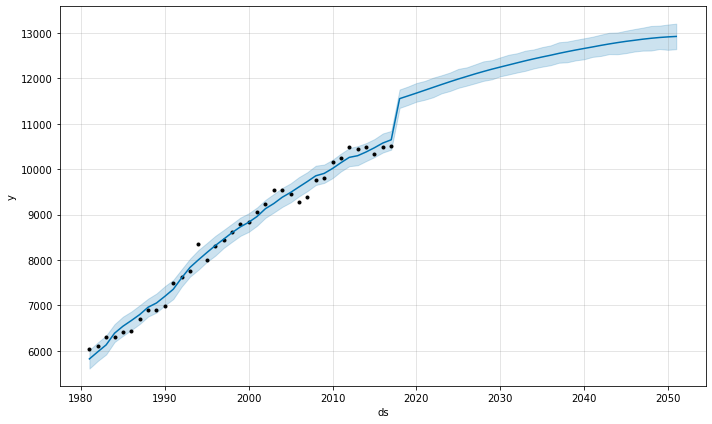

In [30]:
for economy,model in models.items():
    fig1 = model.plot(results.loc[economy])